In [80]:
import random
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [63]:
X, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

<Axes: >

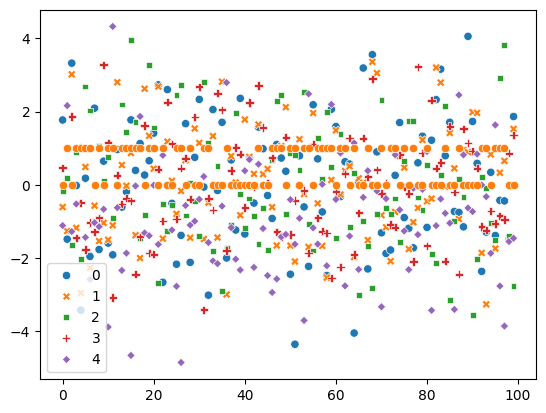

In [64]:
sns.scatterplot(X)
sns.scatterplot(y)

In [65]:
df = pd.DataFrame(X, columns=['1', '2', '3', '4', '5'])
df['target'] = y


In [66]:
df.head()

,1,2,3,4,5,target
0,1.768971,-0.610061,-0.162859,0.462618,-1.116319,0
1,-1.487328,-1.265779,0.195476,-2.499968,2.161709,1
2,3.322914,3.017152,-1.656642,1.862065,-1.279629,0
3,-0.023630,-1.179309,0.899418,-1.450802,-0.526729,1
4,-3.427520,-2.959303,-2.032487,-0.491196,1.017543,1


In [67]:
# ramdom sampling

def sample_rows(df, percent):
    return df.sample(int(percent*df.shape[0]), replace=True)

In [81]:
# columns/features sampling

def sample_columns(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [89]:
# combbined sampling

def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_columns(new_df, col_percent)
    

## Row sampling

In [70]:
# getting random sampled data for decision trees
df1 = sample_rows(df, 0.1)
df2 = sample_rows(df, 0.1)
df3 = sample_rows(df, 0.1)

In [71]:
# creating 3 instance of descision tree classifier

clf_1 = DecisionTreeClassifier()
clf_2 = DecisionTreeClassifier()
clf_3 = DecisionTreeClassifier()

In [72]:
# fitting each model 
clf_1.fit(df1.iloc[:,0:5], df1.iloc[:, -1])
clf_2.fit(df2.iloc[:,0:5], df2.iloc[:, -1])
clf_3.fit(df3.iloc[:,0:5], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[2] <= 0.377\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.5, 'x[4] <= 0.912\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

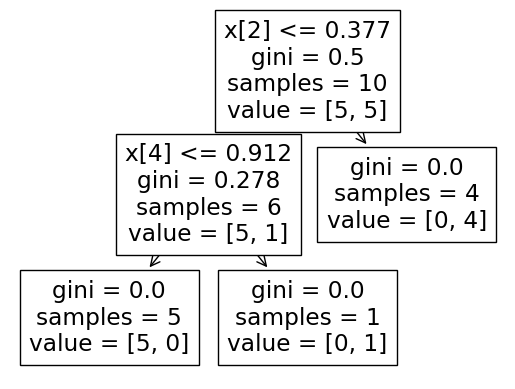

In [73]:
plot_tree(clf_1)

[Text(0.5, 0.75, 'x[1] <= 0.388\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

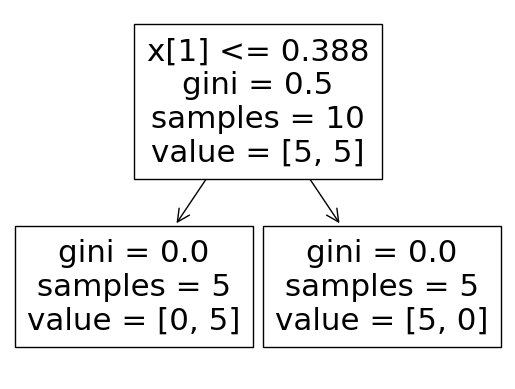

In [74]:
plot_tree(clf_2)

In [75]:
# lets take a query point and see prediction of three decision trees

print(clf_1.predict(np.array([-0.248717,	-0.810937, -1.886474, -1.914145, -1.888833]).reshape(1, 5)))
print(clf_2.predict(np.array([-0.248717,	-0.810937, -1.886474, -1.914145, -1.888833]).reshape(1, 5)))
print(clf_3.predict(np.array([-0.248717,	-0.810937, -1.886474, -1.914145, -1.888833]).reshape(1, 5)))

[0]
[1]
[1]


#### here according to majority the query point should have 1 as output

## Column/Feature Sampling

In [82]:
# getting random sampled data for decision trees
df1 = sample_columns(df, 0.4)
df2 = sample_columns(df, 0.4)
df3 = sample_columns(df, 0.4)

In [83]:
# creating 3 instance of descision tree classifier

clf_1 = DecisionTreeClassifier()
clf_2 = DecisionTreeClassifier()
clf_3 = DecisionTreeClassifier()

In [84]:
# fitting each model 
clf_1.fit(df1.iloc[:,0:2], df1.iloc[:, -1])
clf_2.fit(df2.iloc[:,0:2], df2.iloc[:, -1])
clf_3.fit(df3.iloc[:,0:2], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.3958333333333333, 0.9285714285714286, 'x[1] <= -0.238\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.16666666666666666, 0.7857142857142857, 'x[0] <= 1.913\ngini = 0.187\nsamples = 48\nvalue = [5, 43]'),
 Text(0.08333333333333333, 0.6428571428571429, 'x[1] <= -0.809\ngini = 0.124\nsamples = 45\nvalue = [3, 42]'),
 Text(0.041666666666666664, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.125, 0.5, 'x[1] <= -0.577\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.08333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.16666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.25, 0.6428571428571429, 'x[1] <= -1.918\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.20833333333333334, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2916666666666667, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.625, 0.7857142857142857, 'x[0] <= -0.558\ngini = 0.26\nsamples = 52\nval

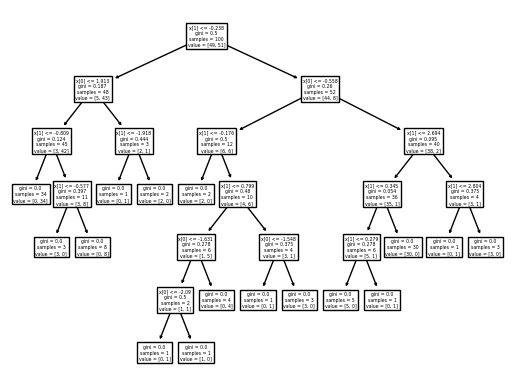

In [85]:
plot_tree(clf_1)

In [88]:
# lets take a query point and see prediction of three decision trees

print(clf_1.predict(np.array([-0.248717,	-0.810937]).reshape(1, 2)))
print(clf_2.predict(np.array([-0.248717,	-0.810937]).reshape(1, 2)))
print(clf_3.predict(np.array([-0.248717,	-0.810937]).reshape(1, 2)))

[1]
[1]
[1]


## Combined Sampling

In [94]:
# getting random sampled data for decision trees
df1 = combined_sampling(df, 0.5, 0.8)
df2 = combined_sampling(df, 0.5, 0.8)
df3 = combined_sampling(df, 0.5, 0.8)

In [95]:
# creating 3 instance of descision tree classifier

clf_1 = DecisionTreeClassifier()
clf_2 = DecisionTreeClassifier()
clf_3 = DecisionTreeClassifier()

In [96]:
# fitting each model 
clf_1.fit(df1.iloc[:,0:4], df1.iloc[:, -1])
clf_2.fit(df2.iloc[:,0:4], df2.iloc[:, -1])
clf_3.fit(df3.iloc[:,0:4], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.6, 0.9, 'x[3] <= -0.005\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.4, 0.7, 'x[0] <= 0.799\ngini = 0.159\nsamples = 23\nvalue = [2, 21]'),
 Text(0.3, 0.5, 'x[1] <= -3.176\ngini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(0.2, 0.3, 'x[2] <= 0.767\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.7, 'x[2] <= 0.698\ngini = 0.384\nsamples = 27\nvalue = [20, 7]'),
 Text(0.7, 0.5, 'x[1] <= 0.196\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

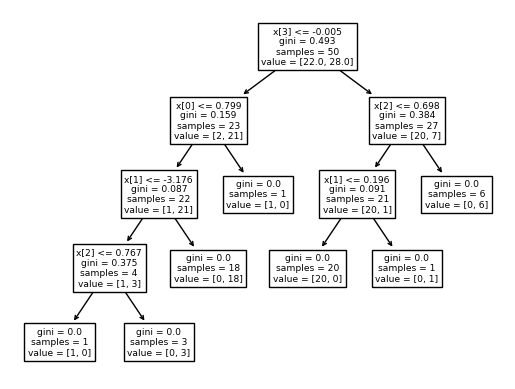

In [97]:
plot_tree(clf_1)

In [98]:
# lets take a query point and see prediction of three decision trees

print(clf_1.predict(np.array([-0.248717,	-0.810937, -1.886474, -1.914145]).reshape(1, 4)))
print(clf_2.predict(np.array([-0.248717,	-0.810937, -1.886474, -1.914145]).reshape(1, 4)))
print(clf_3.predict(np.array([-0.248717,	-0.810937, -1.886474, -1.914145]).reshape(1, 4)))

[1]
[1]
[0]


### according to majority/mode 1 is the output for the above data